#Loading The Important dependencies and model Yolo V8


In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Loading The Directory of Drive Where We Have stored our Train test and valid Data
%cd /content/drive/MyDrive/Class/Yolo_V8

/content/drive/MyDrive/Class/Yolo_V8


#Loading the Yolov8 Model And Training the Data on Our Data Set

In [8]:
%cd /content/drive/MyDrive/Class/Yolo_V8
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Class/Yolo_V8
100% 21.5M/21.5M [00:00<00:00, 149MB/s]
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

In [9]:
!ls runs/detect/train/

args.yaml					    P_curve.png       train_batch285.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch286.jpg
confusion_matrix.png				    R_curve.png       train_batch287.jpg
events.out.tfevents.1710453279.99a103034322.4242.0  results.csv       train_batch2.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


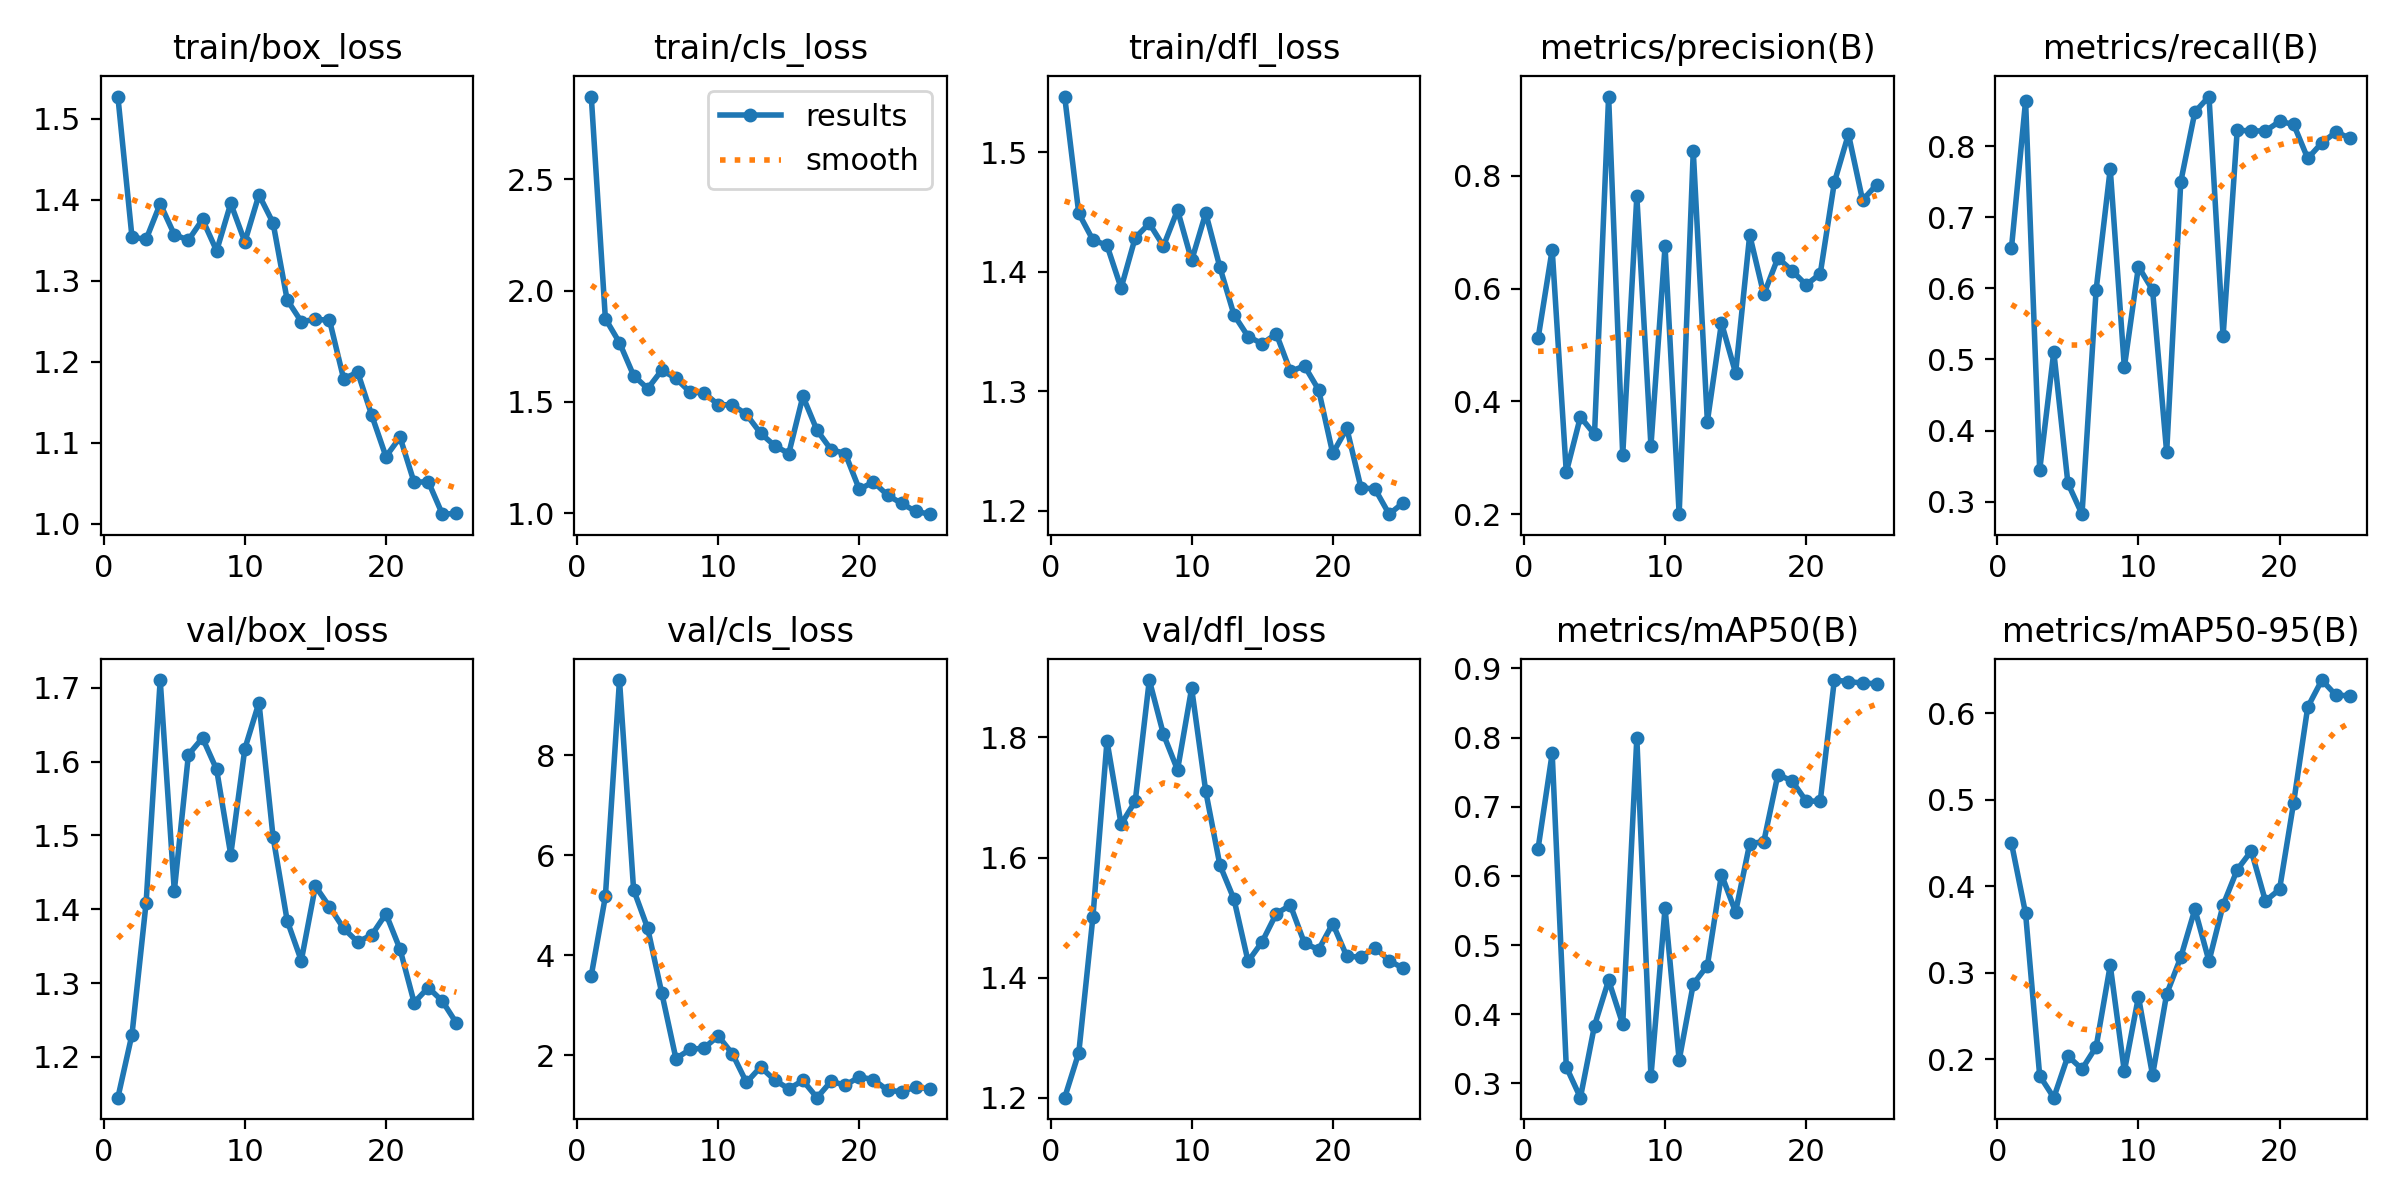

In [15]:
#Model Evaluation Graph
Image(filename='runs/detect/train/results.png', width=600)

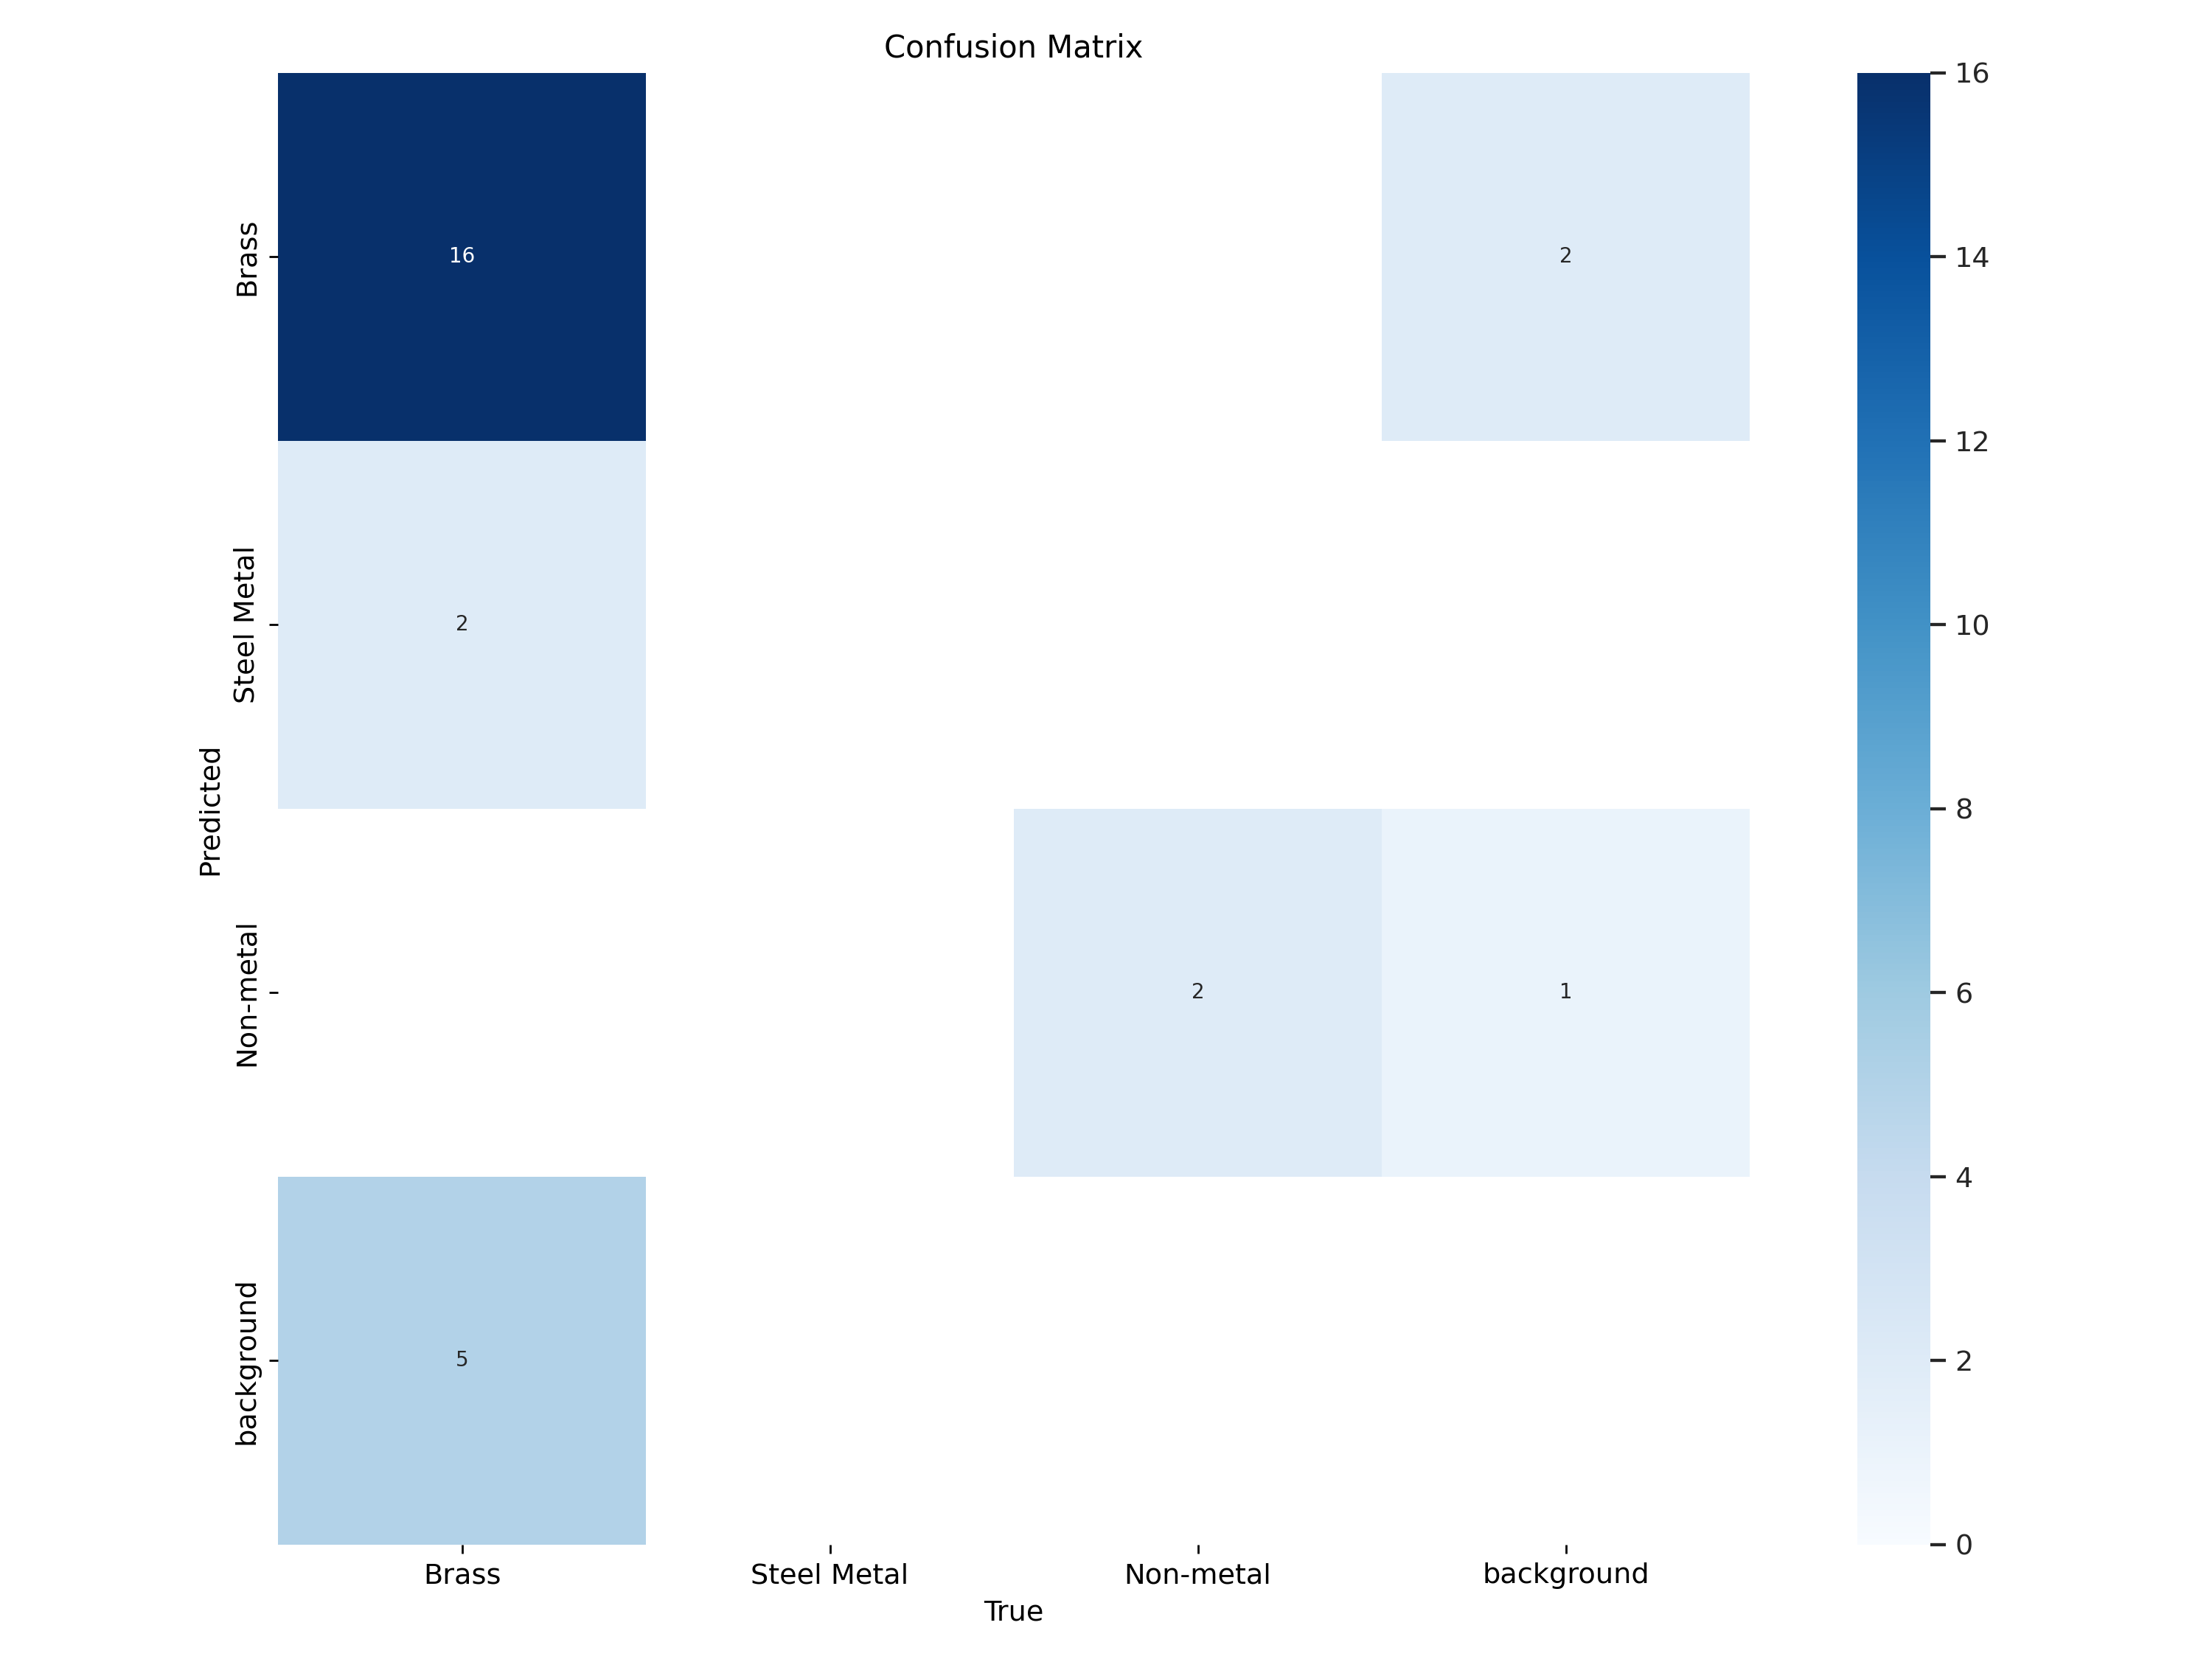

In [22]:
#Model Confusion Matrix
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

# Validating The Model


In [13]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Class/Yolo_V8/data/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.35it/s]
                   all         19         25      0.874      0.805      0.881      0.638
                 Brass         19         23      0.933      0.609      0.767       0.53
             Non-metal         19          2      0.814          1      0.995      0.746
Speed: 0.1ms preprocess, 37.0ms inference, 0.0ms loss, 32.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


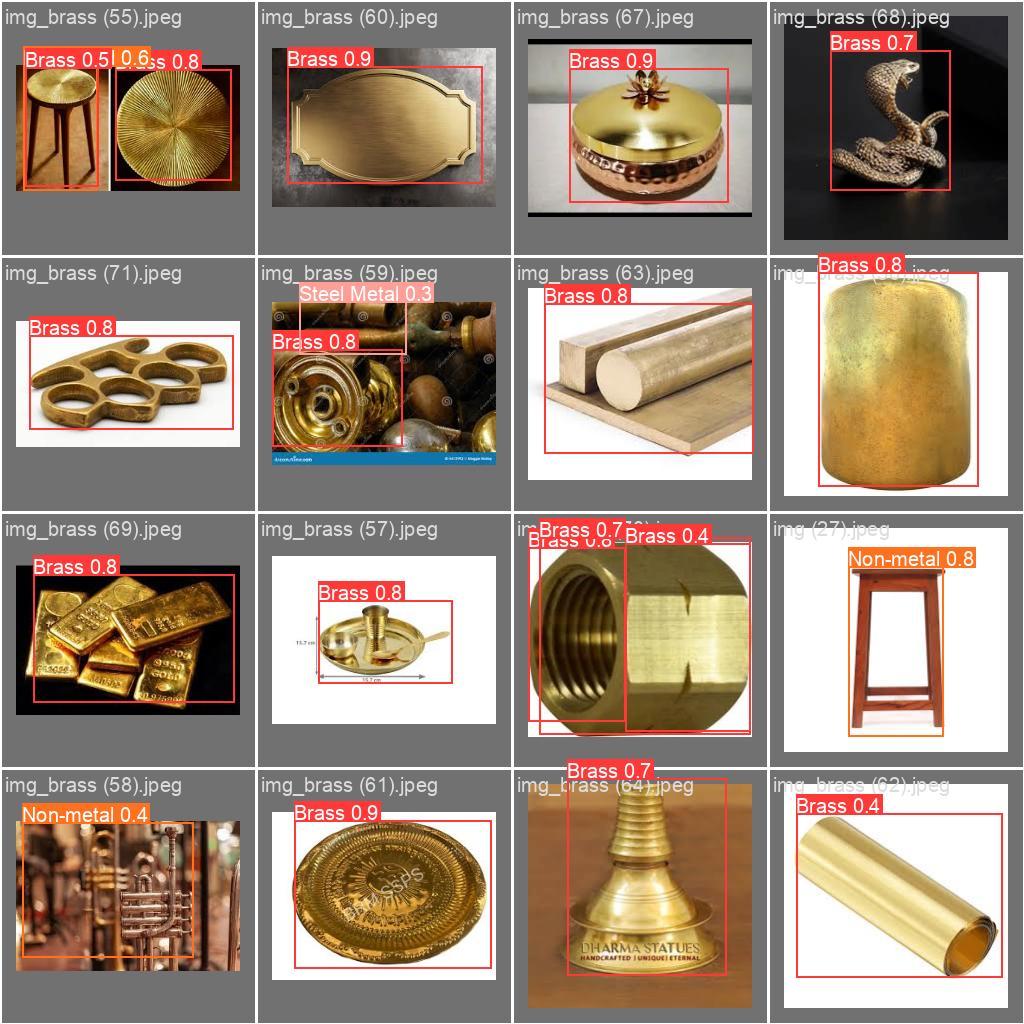

In [17]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

#Predicting The Object Material Using Trained Model

In [18]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/7 /content/drive/MyDrive/Class/Yolo_V8/data/test/images/img (1).png: 224x224 1 Steel Metal, 8.5ms
image 2/7 /content/drive/MyDrive/Class/Yolo_V8/data/test/images/img (12).jpeg: 128x224 1 Non-metal, 68.0ms
image 3/7 /content/drive/MyDrive/Class/Yolo_V8/data/test/images/img (13).jpeg: 160x224 1 Non-metal, 109.4ms
image 4/7 /content/drive/MyDrive/Class/Yolo_V8/data/test/images/img_brass (121).jpeg: 160x224 1 Brass, 1 Steel Metal, 16.1ms
image 5/7 /content/drive/MyDrive/Class/Yolo_V8/data/test/images/img_brass (122).jpeg: 160x224 1 Brass, 9.6ms
image 6/7 /content/drive/MyDrive/Class/Yolo_V8/data/test/images/img_brass (123).jpeg: 160x224 6 Brasss, 9.8ms
image 7/7 /content/drive/MyDrive/Class/Yolo_V8/data/test/images/img_brass (124).jpeg: 160x224 1 Brass, 1 Non-metal, 8.0ms
Speed: 0.9ms preprocess, 32.8ms inference, 7

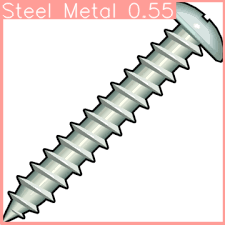

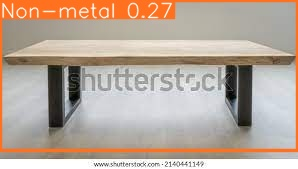

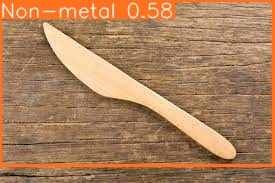

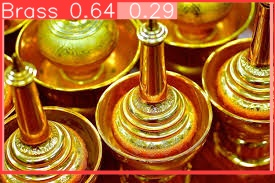

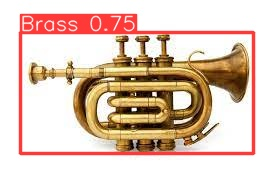

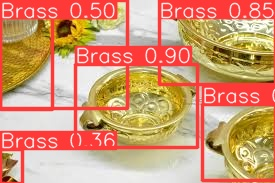

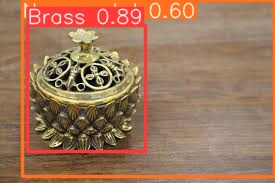

In [19]:
#Displaying The Test DataSet Output
import os
from IPython.display import display, Image


folder_path = "/content/drive/MyDrive/Class/Yolo_V8/runs/detect/predict"

# Get the list of files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Display each image in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    display(Image(filename=image_path))


In [ ]:
# To Predict The Matrial Object object just upload the file to collab and run the below code just give  the source of the image
#!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=<image source here>